### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # Cross-sectional models and methods.
from statsmodels.graphics.api import abline_plot # Add straight lines to plot.
from sklearn.metrics import mean_squared_error, r2_score # Find mean squared error and r2 score.
from sklearn.model_selection import train_test_split #  Split data into train and test groups.
from sklearn import linear_model, preprocessing # For linear models.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### Load Data

In [2]:
dialysis = pd.read_csv('capstone2_dialysis_cleaned_data.csv', index_col=0)

### Explore Data

In [3]:
dialysis.head()

,Provider Number,Network,Facility Name,Five Star Date,Five Star,Address Line 1,City,State,Zip,County,...,SWR Category Text,95% C.I. (Upper Limit) For SWR,95% C.I. (Lower Limit) For SWR,Number Of Patients In This Facility For SWR,Standardized First Kidney Transplant Waitlist Ratio,PPPW Category Text,95% C.I. (Upper Limit) For PPPW,95% C.I. (Lower Limit) For PPPW,Number Of Patients For PPPW,Percentage Of Prevalent Patients Waitlisted
0,42592,13,DCI - LITTLE ROCK RENAL SERVICES LLC,01/01/2015 - 12/31/2018,2,1910 JOHN BARROW RD,LITTLE ROCK,AR,72204,PULASKI,...,As Expected,1.160000,0.120000,56.0,0.450000,As Expected,22.8,3.4,100.0,9.2
1,52761,18,DAVITA-PREMIER DIALYSIS CENTER,01/01/2015 - 12/31/2018,3,7612 ATLANTIC AVENUE,CUDAHY,CA,90201,LOS ANGELES,...,As Expected,1.160000,0.200000,105.0,0.530000,As Expected,32.1,11.8,209.0,20.1
2,72549,1,WALLINGFORD DIALYSIS CARE LLC,01/01/2015 - 12/31/2018,5,720 N MAIN STREET EXT,WALLINGFORD,CT,6492,NEW HAVEN,...,Better than Expected,2.605145,0.337152,12.0,0.998375,As Expected,74.5,10.1,24.0,36.4
3,82524,4,"DSI LAUREL DIALYSIS, LLC",01/01/2015 - 12/31/2018,4,LAUREL SQUARE SHOPPING CENTER,LAUREL,DE,19956,SUSSEX,...,Better than Expected,2.605145,0.337152,8.0,0.998375,As Expected,74.2,0.2,19.0,7.4
4,82527,4,"FRESENIUS MEDICAL CARE SOUTHERN DELAWARE, LLC",01/01/2015 - 12/31/2018,5,9115 ANTIQUE ALLEY,BRIDGEVILLE,DE,19933,SUSSEX,...,Better than Expected,2.605145,0.337152,1.0,0.998375,As Expected,48.4,2.8,44.0,14.2


In [4]:
dialysis.shape

(7626, 94)

In [5]:
dialysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7626 entries, 0 to 7625
Data columns (total 94 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Provider Number                                                                          7626 non-null   int64  
 1   Network                                                                                  7626 non-null   int64  
 2   Facility Name                                                                            7626 non-null   object 
 3   Five Star Date                                                                           7626 non-null   object 
 4   Five Star                                                                                7626 non-null   int64  
 5   Address Line 1                                                

In [6]:
dialysis.columns

Index(['Provider Number', 'Network', 'Facility Name', 'Five Star Date',
       'Five Star', 'Address Line 1', 'City', 'State', 'Zip', 'County',
       'Phone Number', 'Profit Or Non-Profit', 'Chain Owned',
       'Chain Organization', 'Late Shift', 'Number Of Dialysis Stations',
       'Offers In-Center Hemodialysis', 'Offers Peritoneal Dialysis',
       'Offers Home Hemodialysis Training',
       'Certification Or Recertification Date', 'Claims Date', 'CROWNWeb Date',
       'STrR Date', 'Percentage Of Medicare Patients With Hgb < 10 g/dL',
       'Percentage Of Medicare Patients With Hgb > 12 g/dL',
       'Number Of Dialysis Patients With Hgb Data',
       'Patient Transfusion Category Text',
       'Number Of Patients Included In The Transfusion Summary',
       'Percent Of Adult HD Patients With Kt/V >= 1.2',
       'Adult PD Kt/V Data Availability Code',
       'Pediatric HD Kt/V Data Availability Code',
       'Number Of Adult HD Patients With Kt/V Data',
       'Number Of Adult

### Thin to Relevent Data

In [7]:
dialysis_columns =['Network', 
                   'Facility Name',
                   'Five Star', 
                   'Profit Or Non-Profit', 
                   'Chain Owned',
                   'Chain Organization', 
                   'Late Shift', 
                   'Number Of Dialysis Stations',
                   'Offers In-Center Hemodialysis', 
                   'Offers Peritoneal Dialysis',
                   'Offers Home Hemodialysis Training',
                   'Percentage Of Medicare Patients With Hgb < 10 g/dL',
                   'Percentage Of Medicare Patients With Hgb > 12 g/dL',
                   'Number Of Dialysis Patients With Hgb Data',
                   'Number Of Patients Included In The Transfusion Summary',
                   'Percent Of Adult HD Patients With Kt/V >= 1.2',
                   'Number Of Adult HD Patients With Kt/V Data',
                   'Number Of Adult HD Patient-Months With Kt/V Data',
                   'Number Of Adult PD Patients With Kt/V Data',
                   'Number Of Pediatric HD Patients With Kt/V Data',
                   'Number Of Patients In Hypercalcemia Summary',
                   'Number Of Patient-Months In Hypercalcemia Summary',
                   'Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)',
                   'Number Of Patients In Serum Phosphorus Summary',
                   'Number Of Patient-Months In Serum Phosphorus Summary',
                   'Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL',
                   'Number Of Patients Included In Hospitalization Summary',
                   'Number Of Hospitalizations Included In Hospital Readmission Summary',
                   'Number Of Patients Included In Survival Summary',
                   'Mortality Rate (Facility)',
                   'Readmission Rate (Facility)',
                   'Hospitalization Rate (Facility)',
                   'Number Of Pediatric PD Patients With Kt/V Data',
                   'Standard Infection Ratio',
                   'Transfusion Rate (Facility)',
                   'Number Of Patients Included In Fistula Summary',
                   'Fistula Rate (Facility)',
                   'Number Of Patients In Long Term Catheter Summary',
                   'Number Of Patient-Months In Long Term Catheter Summary',
                   'Percentage Of Adult Patients With Long Term Catheter In Use',
                   'Number Of Patients In nPCR Summary', 
                   'Number Of Patients In This Facility For SWR',
                   'Standardized First Kidney Transplant Waitlist Ratio',
                   'Number Of Patients For PPPW',
                   'Percentage Of Prevalent Patients Waitlisted']

In [8]:
dialysis = dialysis[dialysis_columns]

In [9]:
dialysis.shape

(7626, 49)

In [10]:
dialysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7626 entries, 0 to 7625
Data columns (total 49 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Network                                                                                  7626 non-null   int64  
 1   Facility Name                                                                            7626 non-null   object 
 2   Five Star                                                                                7626 non-null   int64  
 3   Profit Or Non-Profit                                                                     7626 non-null   int64  
 4   Chain Owned                                                                              7626 non-null   int64  
 5   Chain Organization                                            

In [11]:
dialysis['Chain Owned'].head()

0    1
1    1
2    1
3    1
4    1
Name: Chain Owned, dtype: int64

### Dependent Variable
Does star rating or profit status affect mortality rate?

In [12]:
Hospitalization = dialysis['Hospitalization Rate (Facility)']

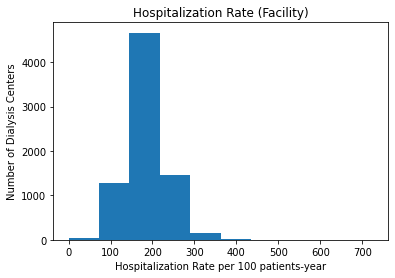

In [13]:
dialysis_histogram = plt.hist(Hospitalization)
dialysis_histogram = plt.xlabel('Hospitalization Rate per 100 patients-year')
dialysis_histogram = plt.ylabel('Number of Dialysis Centers')
dialysis_histogram = plt.title('Hospitalization Rate (Facility)')

In [14]:
Hospitalization.describe()

count    7626.000000
mean      186.714511
std        47.997996
min         0.000000
25%       156.825000
50%       186.714511
75%       211.600000
max       725.200000
Name: Hospitalization Rate (Facility), dtype: float64

In [15]:
Hospitalization.value_counts(dropna=False)

186.714511    769
193.500000     13
190.300000     13
196.200000     13
198.300000     13
             ... 
83.500000       1
96.500000       1
278.200000      1
230.000000      1
148.000000      1
Name: Hospitalization Rate (Facility), Length: 2005, dtype: int64

### Correlations

In [16]:
dialysis.corr()

,Network,Five Star,Profit Or Non-Profit,Chain Owned,Late Shift,Number Of Dialysis Stations,Offers In-Center Hemodialysis,Offers Peritoneal Dialysis,Offers Home Hemodialysis Training,Percentage Of Medicare Patients With Hgb < 10 g/dL,...,Number Of Patients Included In Fistula Summary,Fistula Rate (Facility),Number Of Patients In Long Term Catheter Summary,Number Of Patient-Months In Long Term Catheter Summary,Percentage Of Adult Patients With Long Term Catheter In Use,Number Of Patients In nPCR Summary,Number Of Patients In This Facility For SWR,Standardized First Kidney Transplant Waitlist Ratio,Number Of Patients For PPPW,Percentage Of Prevalent Patients Waitlisted
Network,1.000000,0.066921,-0.006971,0.063757,0.005053,0.016094,-0.035689,-0.052489,-0.083759,-0.113953,...,0.035966,0.105625,0.035966,0.053499,-0.072649,0.016645,0.061852,-0.055737,0.107255,-0.016431
Five Star,0.066921,1.000000,0.035614,0.179677,0.060647,0.027965,0.153092,-0.091575,-0.057003,-0.234456,...,0.055725,0.512214,0.055725,0.061780,-0.532495,-0.072855,0.005914,0.059690,0.004866,0.027606
Profit Or Non-Profit,-0.006971,0.035614,1.000000,0.319553,-0.050009,0.037719,-0.015223,0.020314,0.038673,0.070548,...,0.046735,-0.005134,0.046735,0.039073,-0.121793,-0.211732,0.004208,-0.096756,0.023809,-0.089083
Chain Owned,0.063757,0.179677,0.319553,1.000000,-0.014469,0.124503,0.064424,0.017419,0.029293,-0.152035,...,0.067476,0.041650,0.067476,0.058478,-0.166302,-0.189164,0.054920,-0.058320,0.101790,-0.029372
Late Shift,0.005053,0.060647,-0.050009,-0.014469,1.000000,0.234909,0.105389,0.076444,0.084021,-0.036973,...,0.349133,0.053785,0.349133,0.347621,-0.003241,-0.012116,0.293356,0.090986,0.327001,0.081202
Number Of Dialysis Stations,0.016094,0.027965,0.037719,0.124503,0.234909,1.000000,0.440465,0.013899,0.019431,-0.059814,...,0.741142,-0.046899,0.741142,0.714355,-0.001502,-0.060409,0.585964,-0.054504,0.674482,-0.101993
Offers In-Center Hemodialysis,-0.035689,0.153092,-0.015223,0.064424,0.105389,0.440465,1.000000,-0.217214,-0.197663,-0.096704,...,0.312977,0.013088,0.312977,0.193613,-0.024365,0.025975,0.146869,-0.069842,0.124058,-0.256235
Offers Peritoneal Dialysis,-0.052489,-0.091575,0.020314,0.017419,0.076444,0.013899,-0.217214,1.000000,0.538597,0.063664,...,0.048574,-0.006867,0.048574,0.074829,0.053274,0.068964,0.188921,0.125447,0.207448,0.174233
Offers Home Hemodialysis Training,-0.083759,-0.057003,0.038673,0.029293,0.084021,0.019431,-0.197663,0.538597,1.000000,0.080738,...,0.062184,-0.002472,0.062184,0.049221,0.017460,0.003294,0.150801,0.095062,0.181153,0.142044
Percentage Of Medicare Patients With Hgb < 10 g/dL,-0.113953,-0.234456,0.070548,-0.152035,-0.036973,-0.059814,-0.096704,0.063664,0.080738,1.000000,...,-0.050605,-0.115892,-0.050605,-0.082325,0.132869,-0.002300,-0.036611,-0.016748,-0.040170,-0.032259


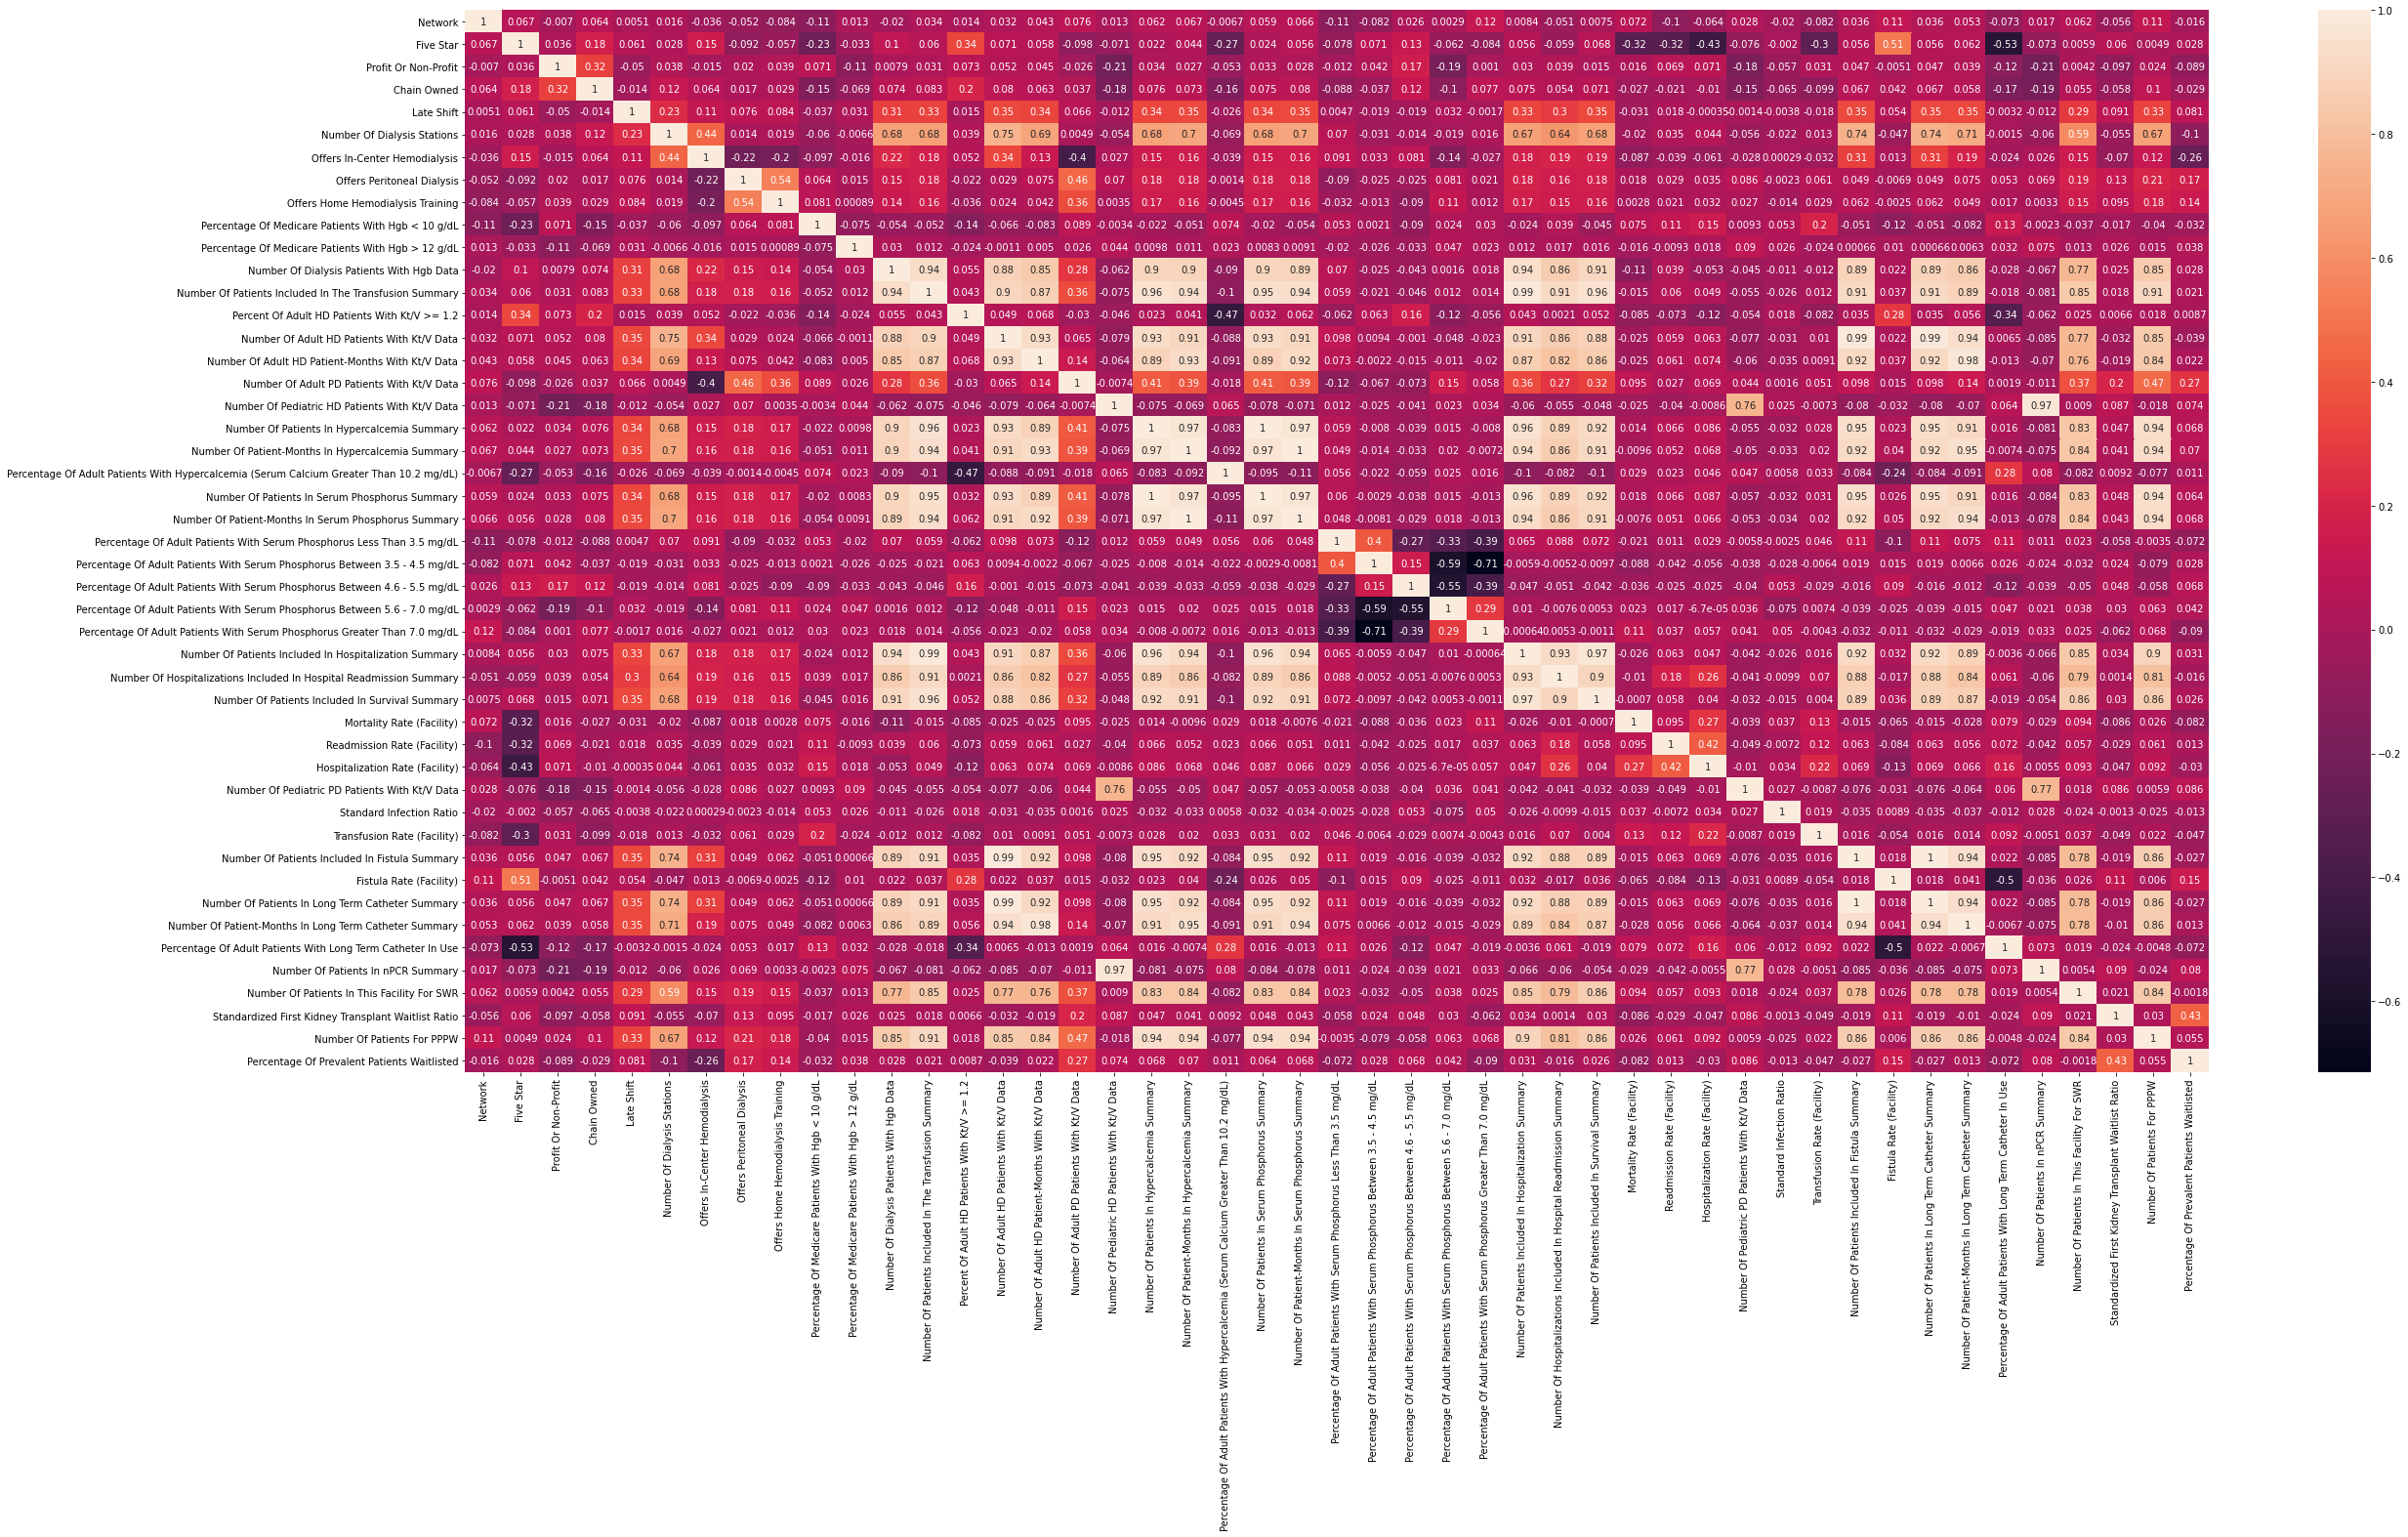

In [17]:
plt.figure(figsize=(40,20))
dialysis_heatmap = sns.heatmap(dialysis.corr(), annot=True)

In [18]:
dialysis_columns = ['Facility Name', 
                    'Five Star', 
                    'Profit Or Non-Profit', 
                    'Number Of Dialysis Stations',
                    'Percentage Of Medicare Patients With Hgb < 10 g/dL',
                    'Percent Of Adult HD Patients With Kt/V >= 1.2',
                    'Mortality Rate (Facility)',
                    'Readmission Rate (Facility)',
                    'Hospitalization Rate (Facility)',
                    'Transfusion Rate (Facility)',
                    'Fistula Rate (Facility)',
                    'Percentage Of Adult Patients With Long Term Catheter In Use']

In [19]:
dialysis = dialysis[dialysis_columns]

In [20]:
dialysis_short = dialysis.rename(columns = 
                                 {'Profit Or Non-Profit':'For Profit',
                                  'Number Of Dialysis Stations' : '# Dialysis Stations',
                                  'Percentage Of Medicare Patients With Hgb < 10 g/dL':'% Hgb < 10 g/dL',
                                  'Percent Of Adult HD Patients With Kt/V >= 1.2' : '% Kt/V >= 1.2',
                                  'Mortality Rate (Facility)' : 'Mortality Rate',
                                  'Readmission Rate (Facility)':'Readmission Rate',
                                  'Hospitalization Rate (Facility)':'Hospitalization Rate',
                                  'Transfusion Rate (Facility)':'Transfusion Rate',
                                  'Fistula Rate (Facility)':'Fistula Rate',
                                  'Percentage Of Adult Patients With Long Term Catheter In Use':'% Long Term Catheter'
                                  
                   })

<Figure size 2880x1440 with 0 Axes>

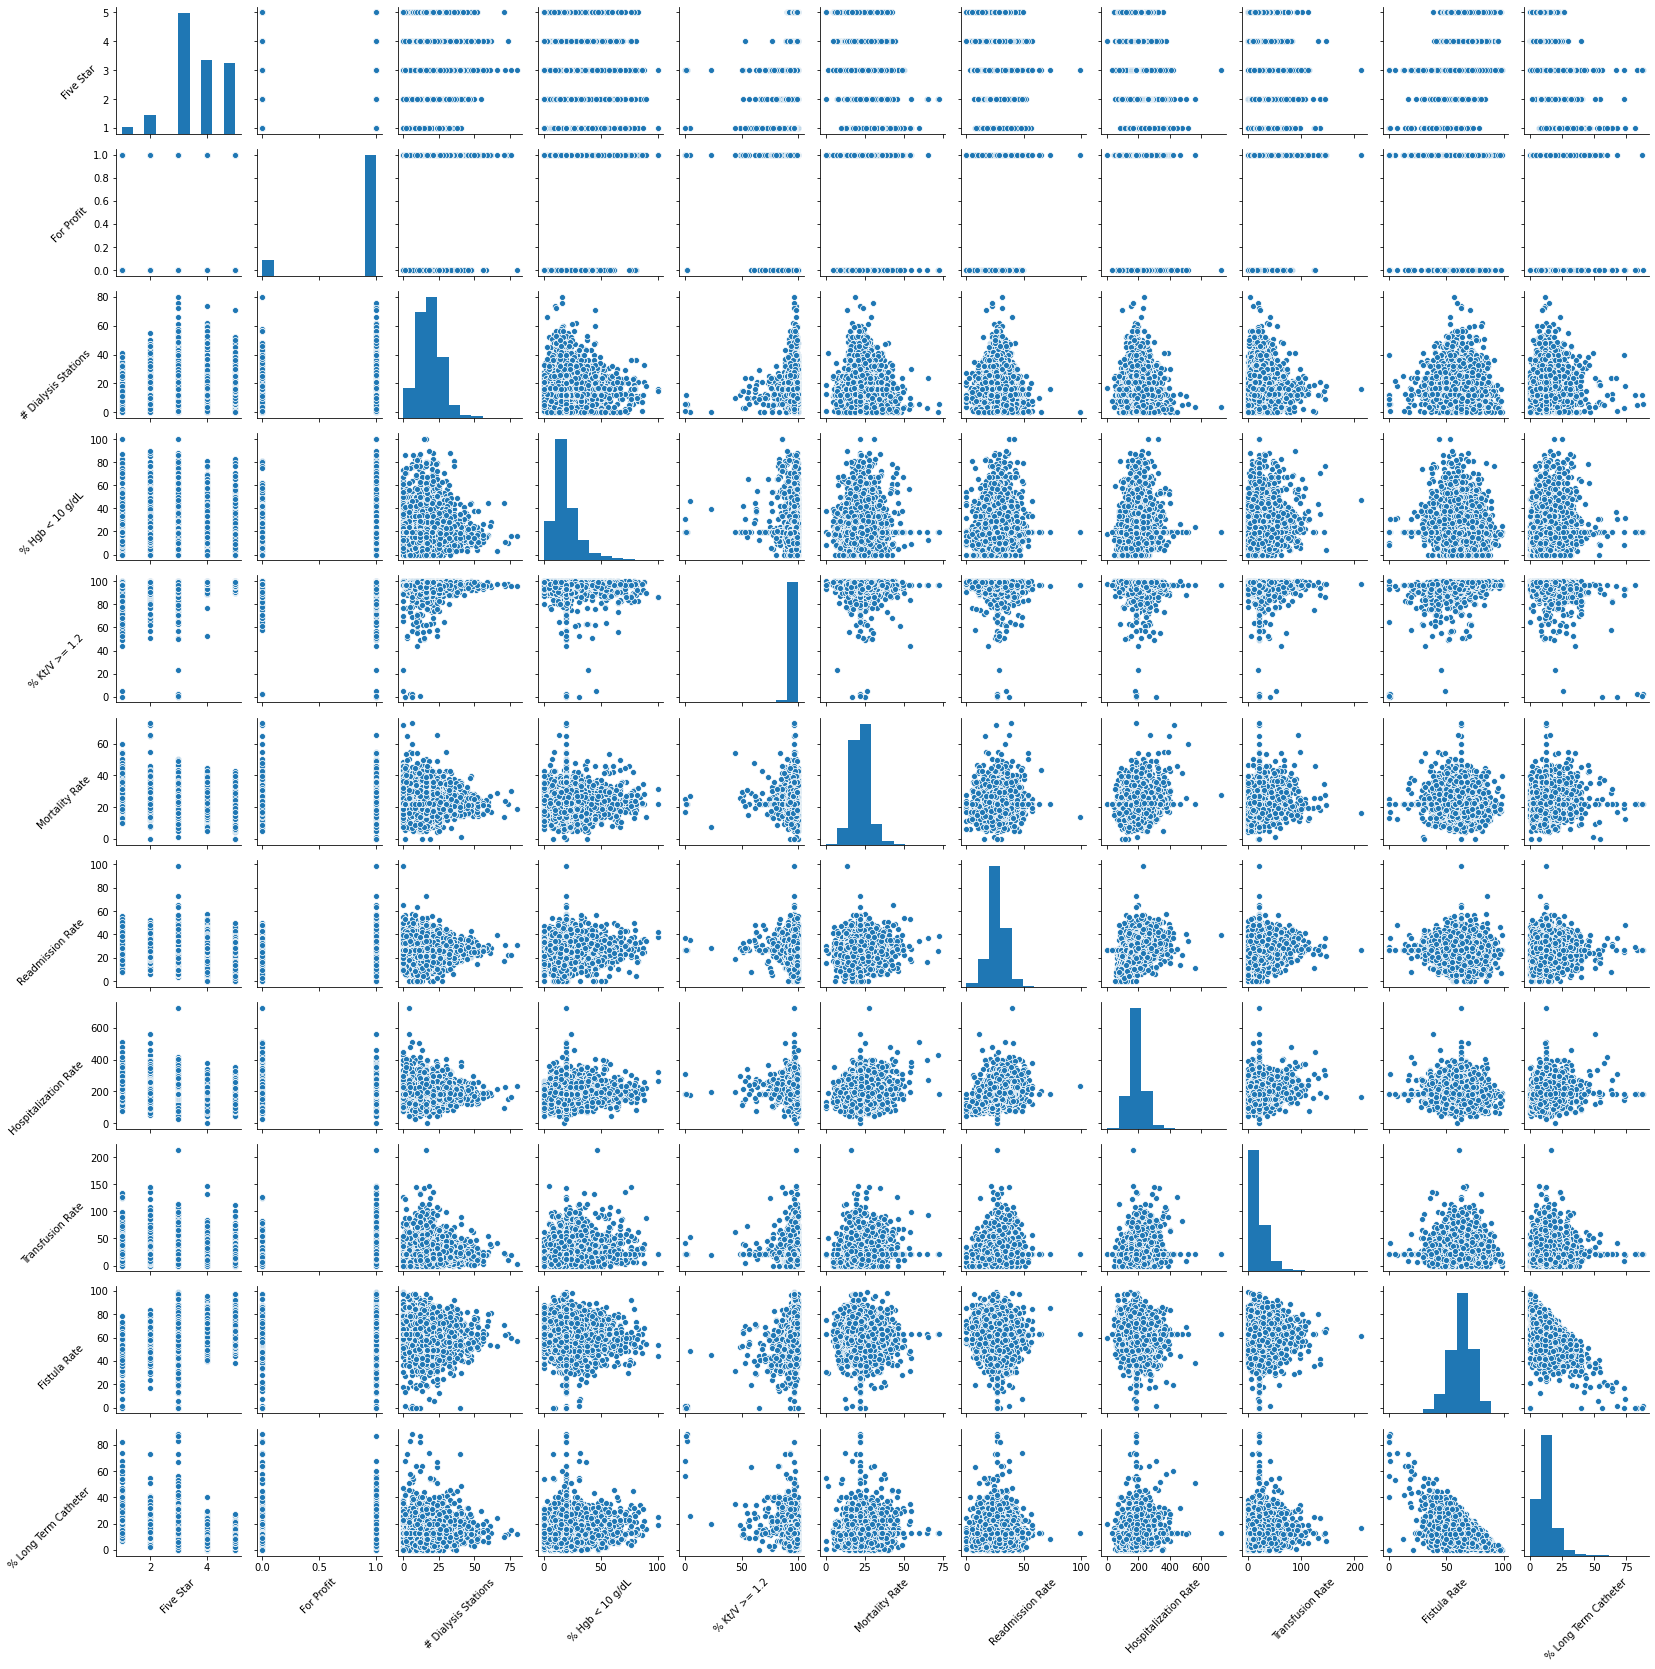

In [21]:
plt.figure(figsize=(40,20))
dialysis_pairplot = sns.pairplot(dialysis_short, height=2)
for ax in dialysis_pairplot.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

### Scatter & Reg Plots of Columns That Most Highly Correlate With Hospitalizations
HgB < 10 g/dL Most Interesting

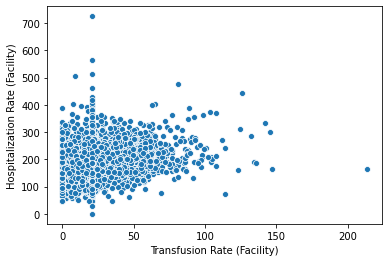

In [22]:
Transfusion_scatterplot = sns.scatterplot(x='Transfusion Rate (Facility)', y='Hospitalization Rate (Facility)', data=dialysis)

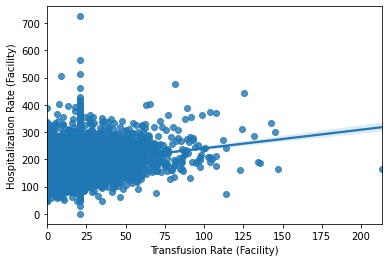

In [23]:
Transfusion_regplot = sns.regplot(x='Transfusion Rate (Facility)', y='Hospitalization Rate (Facility)', data=dialysis)

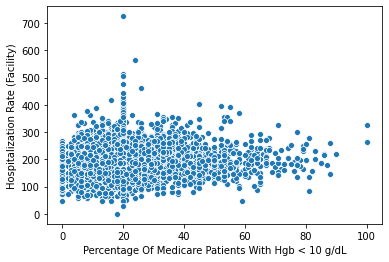

In [24]:
HgbOver10_scatterplot = sns.scatterplot(x=', y='Hospitalization Rate (Facility)', data=dialysis)

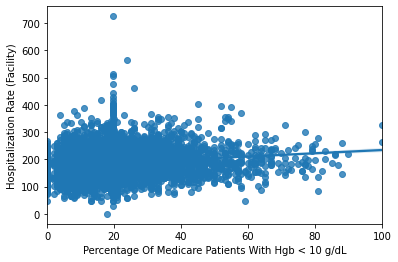

In [25]:
HgbOver10_regplot = sns.regplot(x='Percentage Of Medicare Patients With Hgb < 10 g/dL', y='Hospitalization Rate (Facility)', data=dialysis)

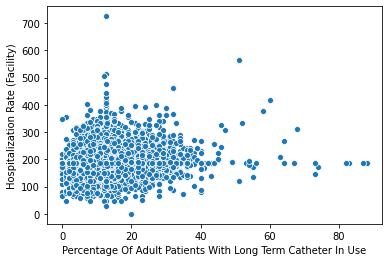

In [26]:
Catheter_scatterplot = sns.scatterplot(x='Percentage Of Adult Patients With Long Term Catheter In Use', y='Hospitalization Rate (Facility)', data=dialysis)

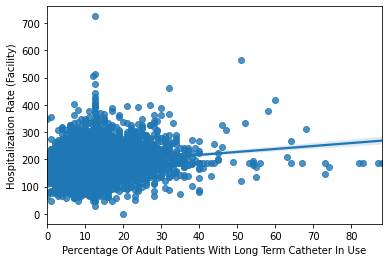

In [27]:
Catheter_regplot = sns.regplot(x='Percentage Of Adult Patients With Long Term Catheter In Use', y='Hospitalization Rate (Facility)', data=dialysis)

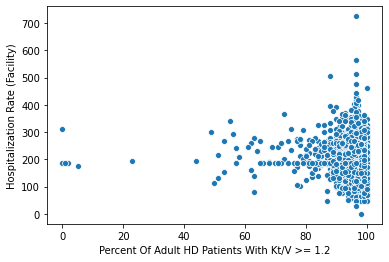

In [28]:
KtVOver12_scatterplot = sns.scatterplot(x='Percent Of Adult HD Patients With Kt/V >= 1.2', y='Hospitalization Rate (Facility)', data=dialysis)

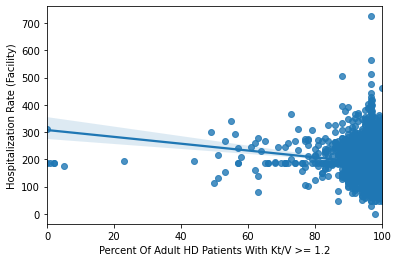

In [29]:
KtVOver12_regplot = sns.regplot(x='Percent Of Adult HD Patients With Kt/V >= 1.2', y='Hospitalization Rate (Facility)', data=dialysis)

### Star Rating

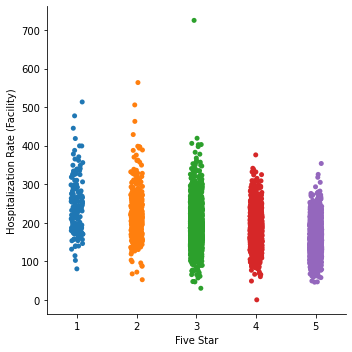

In [88]:
sns.catplot(x='Five Star', y='Hospitalization Rate (Facility)', data=dialysis)

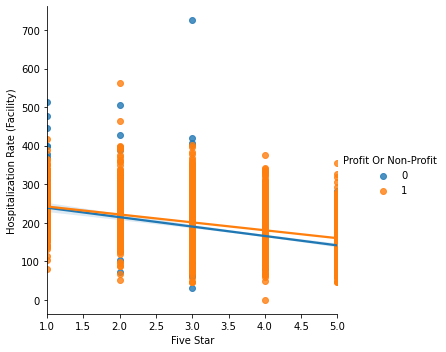

In [98]:
sns.lmplot(x='Five Star', y='Hospitalization Rate (Facility)', hue='Profit Or Non-Profit', data=dialysis)

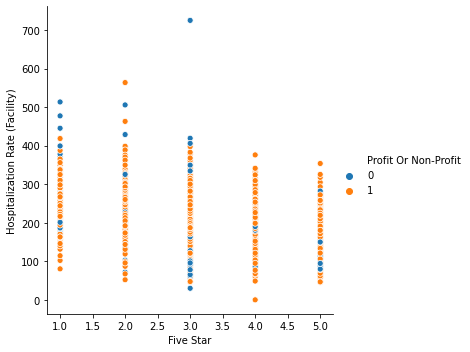

In [99]:
sns.relplot(x='Five Star', y='Hospitalization Rate (Facility)', hue='Profit Or Non-Profit', data=dialysis)

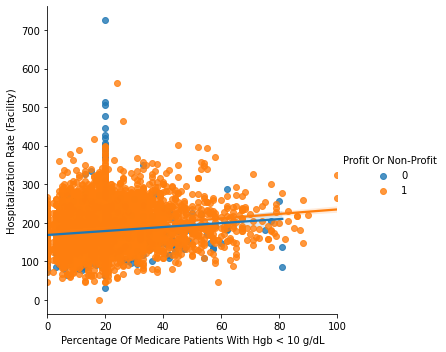

In [100]:
sns.lmplot(x='Percentage Of Medicare Patients With Hgb < 10 g/dL', y='Hospitalization Rate (Facility)', hue='Profit Or Non-Profit', data=dialysis)